# 多项式回归

## 多项式回归介绍

> 多项式（Polynomial）是代数学中的基础概念，是由称为未知数的变量和称为系数的常量通过有限次加法、减法、乘法以及自然数幂次的乘方运算得到的代数表达式。多项式是整式的一种。未知数只有一个的多项式称为一元多项式；例如 x^2-3x+4x2−3x+4 就是一个一元多项式。未知数不止一个的多项式称为多元多项式，例如 x^3-2xyz^2+2yz+1就是一个三元多项式。

In [3]:
# 加载示例数据
x = [4, 8, 12, 25, 32, 43, 58, 63, 69, 79]
y = [20, 33, 50, 56, 42, 31, 33, 46, 65, 75]

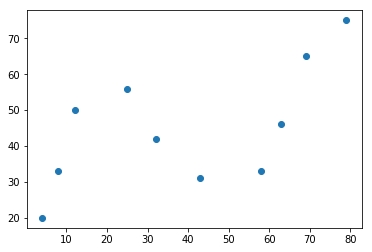

In [4]:
# 示例数据一共有 10 组，分别对应着横坐标和纵坐标
# Matplotlib 绘制数据，查看其变化趋势
%matplotlib inline
from matplotlib import pyplot as plt
plt.scatter(x, y)

## 实现 2 次多项式拟合

通过多项式来拟合上面的散点数据
首先，一个标准的一元高阶多项式函数如下所示，其中，m 表示多项式的阶数，x^j表示 x 的 j 次幂，w 则代表该多项式的系数。

$$ y(x, w) = w_0 + w_1x + w_2x^2 +...+w_mx^m = \sum\limits_{j=0}^{m}w_jx^j \tag{1} $$

当我们使用上面的多项式去拟合散点时，需要确定两个要素，分别是：多项式系数 w 以及多项式阶数 m，这也是多项式的两个基本要素。
如果通过手动指定多项式阶数 m 的大小，那么就只需要确定多项式系数 w 的值是多少。例如，这里首先指定 m=2，多项式就变成了：

$$ y(x, w) = w_0 + w_1x + w_2x^2= \sum\limits_{j=0}^{2}w_jx^j \tag{2} $$

我们确定 ww 的值的大小时，就回到了前面线性回归中学习到的内容。

In [13]:
# 首先，我们构造两个函数，分别是用于拟合的多项式函数，以及误差函数。


"""实现 2 次多项式函数及误差函数
"""
def func(p, x):
    """根据公式，定义 2 次多项式函数
    """ 
    w0, w1, w2 = p
    f = w0 + w1*x + w2*x*x
    return f

def err_func(p, x, y):
    """残差函数（观测值与拟合值之间的差距）
    """
    ret = func(p, x) - y
    return ret

In [15]:
# 然后，使用 NumPy 提供的随机数方法初始化 3 个 ww 参数
import numpy as np

p_init = np.random.randn(3)
p_init

array([-0.23336917, -0.07608846, -2.10888956])

接下来，就是使用最小二乘法求解最优参数的过程。这里为了方便，我们直接使用 Scipy 提供的最小二乘法类，得到最佳拟合参数。
当然，你完全可以按照线性回归实验中最小二乘法公式自行求解参数。不过，实际工作中为了快速实现，往往会使用像 Scipy 这样现成的函数

In [16]:
"""使用 Scipy 提供的最小二乘法函数得到最佳拟合参数
"""
from scipy.optimize import leastsq

parameters = leastsq(err_func, p_init, args=(np.array(x), np.array(y)))

print('Fitting Parameters: ', parameters[0])

Fitting Parameters:  [ 3.76893109e+01 -2.60474090e-01  8.00078015e-03]


这里得到的最佳拟合参数 w_0, w_1, w_2依次为 3.76893117e+01, -2.60474147e-01 和 8.00078082e-03。
也就是说，我们拟合后的函数（保留两位有效数字）为：

$$ y(x) = 37 - 0.26x + 0.0080x^2 \tag{3} $$

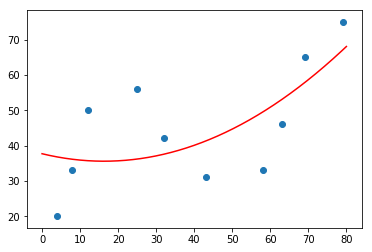

In [17]:
# 然后，我们尝试绘制出拟合后的图像。
"""绘制 2 次多项式拟合图像
"""
# 绘制拟合图像时需要的临时点
x_temp = np.linspace(0, 80, 10000)

# 绘制拟合函数曲线
plt.plot(x_temp, func(parameters[0], x_temp), 'r')

# 绘制原数据点
plt.scatter(x, y)

## 实现 N 次多项式拟合

你会发现，上面采用 2 次多项式拟合的结果也不能恰当地反映散点的变化趋势。此时，我们可以尝试 3 次及更高次多项式拟合。
接下来的代码中，我们将针对上面 2 次多项式拟合的代码稍作修改，实现一个 N 次多项式拟合的方法。

In [21]:
"""实现 n 次多项式拟合
"""
def fit_func(p, x):
    """根据公式，定义 n 次多项式函数
    """
    f = np.poly1d(p)
    return f(x)

def err_func(p, x, y):
    """残差函数（观测值与拟合值之间的差距）
    """
    ret = fit_func(p, x) - y
    return ret

def n_poly(n):
    """n 次多项式拟合
    """
    p_init = np.random.randn(n) # 生成 n 个随机数
    parameters = leastsq(err_func, p_init, args=(np.array(x), np.array(y)))
    return parameters[0]

In [22]:
# 使用 n=3（2 次多项式） 验证一下上面的代码是否可用。
n_poly(3)

array([ 8.00078049e-03, -2.60474117e-01,  3.76893113e+01])

此时得到的参数结果和公式（3）的结果一致，只是顺序有出入。这是因为 NumPy 中的多项式函数 np.poly1d(3) 默认的样式是：

$$ y(x) = 0.0080x^2 - 0.26x + 37\tag{4} $$

接下来，绘制 3，4，5，6，7, 8 次多项式的拟合结果。

Text(0.5, 1.0, 'm = 8')

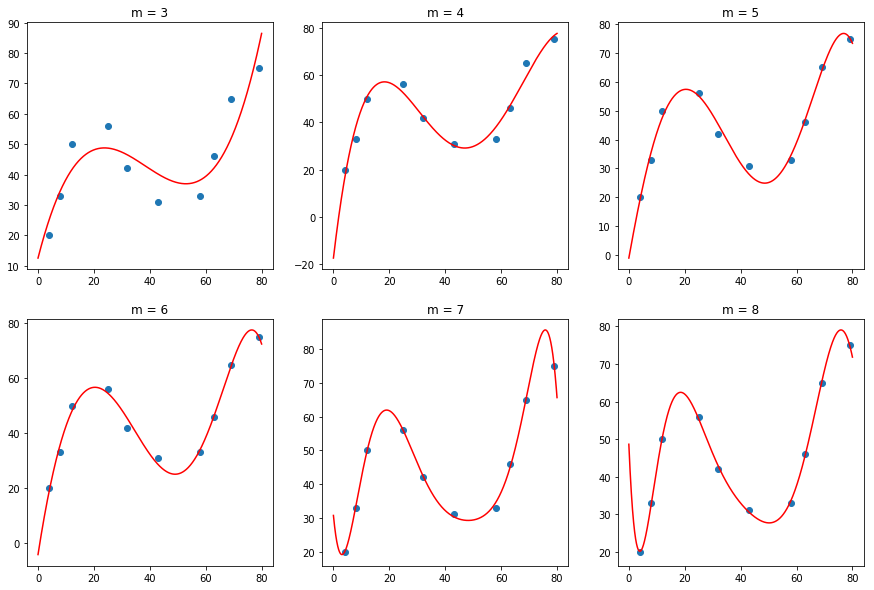

In [24]:
"""绘制出 3，4，5，6，7, 8, 9 次多项式的拟合图像
"""

# 绘制拟合图像时需要的临时点
x_temp = np.linspace(0, 80, 10000)

# 绘制子图
fig, axes = plt.subplots(2, 3, figsize=(15,10))

axes[0,0].plot(x_temp, fit_func(n_poly(4), x_temp), 'r')
axes[0,0].scatter(x, y)
axes[0,0].set_title("m = 3")

axes[0,1].plot(x_temp, fit_func(n_poly(5), x_temp), 'r')
axes[0,1].scatter(x, y)
axes[0,1].set_title("m = 4")

axes[0,2].plot(x_temp, fit_func(n_poly(6), x_temp), 'r')
axes[0,2].scatter(x, y)
axes[0,2].set_title("m = 5")

axes[1,0].plot(x_temp, fit_func(n_poly(7), x_temp), 'r')
axes[1,0].scatter(x, y)
axes[1,0].set_title("m = 6")

axes[1,1].plot(x_temp, fit_func(n_poly(8), x_temp), 'r')
axes[1,1].scatter(x, y)
axes[1,1].set_title("m = 7")

axes[1,2].plot(x_temp, fit_func(n_poly(9), x_temp), 'r')
axes[1,2].scatter(x, y)
axes[1,2].set_title("m = 8")

从上面的 6 张图可以看出，当 m=4（4 次多项式） 时，图像拟合的效果已经明显优于 m=3 的结果。但是随着 m 次数的增加，当 m=8 时，曲线呈现出明显的震荡，这也就是线性回归实验中所讲到的**过拟和（Overfitting）现象**。

## 使用 scikit-learn 进行多项式拟合

除了像上面我们自己去定义多项式及实现多项式回归拟合过程，也可以使用 scikit-learn 提供的多项式回归方法来完成。
这里，我们会用到<font color="red">sklearn.preprocessing.PolynomialFeatures()</font> 这个类。**PolynomialFeatures() 主要的作用是产生多项式特征矩阵**。

对于一个二次多项式而言，我们知道它的标准形式为： $ y(x, w) = w_0 + w_1x + w_2x^2 $。但是，多项式回归却相当于线性回归的特殊形式。例如，我们这里令 $ x = x_1 $, $ x^2 = x_2 $，那么原方程就转换为：$ y(x, w) = w_0 + w_1x_1 + w_2x_2 $，这也就变成了多元线性回归。这就完成了一元高次多项式到多元一次多项式之间的转换。

举例说明，对于自变量向量 X 和因变量 y，如果 X：

$$ \mathbf{X} = \begin{bmatrix} 2 \[0.3em] -1 \[0.3em] 3
\end{bmatrix} \tag{5a}$$

我们可以通过$ y = w_1 x + w_0 $线性回归模型进行拟合。同样，如果对于一元二次多项式$ y(x, w) = w_0 + w_1x + w_2x^2 $，如果能得到由 $ x = x_1 $, $ x^2 = x_2 $ 构成的特征矩阵，即：

$$ \mathbf{X} = \left [ X, X^2 \right ] = \begin{bmatrix} 2& 4\ -1 & 1\ 3 & 9 \end{bmatrix} \tag{5b} $$

那么也就可以通过线性回归进行拟合了。

你可以手动计算上面的结果，但是当多项式为一元高次或者多元高次时，特征矩阵的表达和计算过程就变得比较复杂了。
例如，下面是二元二次多项式的特征矩阵表达式。

$$ \mathbf{X} = \left [ X_{1}, X_{2}, X_{1}^2, X_{1}X_{2}, X_{2}^2 \right ] \tag{5c} $$

还好，在 scikit-learn 中，我们可以通过 PolynomialFeatures() 类自动产生多项式特征矩阵，PolynomialFeatures() 类的默认参数及常用参数定义如下：

In [ ]:
sklearn.preprocessing.PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)

* degree: 多项式次数，默认为 2 次多项式
* interaction_only: 默认为 False，如果为 True 则产生相互影响的特征集。
* include_bias: 默认为 True，包含多项式中的截距项。

对应上面的特征向量，我们使用 PolynomialFeatures() 的主要作用是产生 2 次多项式对应的特征矩阵，如下所示：

In [30]:
"""使用 PolynomialFeatures 自动生成特征矩阵
"""
from sklearn.preprocessing import PolynomialFeatures

X=[2, -1, 3]
X_reshape = np.array(X).reshape(len(X), 1) # 转换为列向量
PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_reshape)

array([[ 2.,  4.],
       [-1.,  1.],
       [ 3.,  9.]])

对于上方单元格中的矩阵，第 1 列为 $X^1$，第 2 列为 $X^2$。我们就可以通过多元线性方程 $ y(x, w) = w_0 + w_1x_1 + w_2x_2 $ 对数据进行拟合。

回到 2.1 小节中的示例数据，其自变量应该是 xx，而因变量是 yy。如果我们使用 2 次多项式拟合，那么首先使用 PolynomialFeatures() 得到特征矩阵。

In [31]:
"""使用 sklearn 得到 2 次多项式回归特征矩阵
"""
from sklearn.preprocessing import PolynomialFeatures

x = np.array(x).reshape(len(x), 1) # 转换为列向量
y = np.array(y).reshape(len(y), 1)


poly_features = PolynomialFeatures(degree=2, include_bias=False)
poly_x = poly_features.fit_transform(x)

poly_x

array([[4.000e+00, 1.600e+01],
       [8.000e+00, 6.400e+01],
       [1.200e+01, 1.440e+02],
       [2.500e+01, 6.250e+02],
       [3.200e+01, 1.024e+03],
       [4.300e+01, 1.849e+03],
       [5.800e+01, 3.364e+03],
       [6.300e+01, 3.969e+03],
       [6.900e+01, 4.761e+03],
       [7.900e+01, 6.241e+03]])

可以看到，输出结果正好对应一元二次多项式特征矩阵公式：$ \left [ X, X^2 \right ] $

然后，我们使用 scikit-learn 训练线性回归模型。这里将会使用到 LinearRegression() 类，LinearRegression() 类的默认参数及常用参数定义如下：

In [ ]:
sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

* fit_intercept: 默认为 True，计算截距项。
* normalize: 默认为 False，不针对数据进行标准化处理。
* copy_X: 默认为 True，即使用数据的副本进行操作，防止影响原数据。
* n_jobs: 计算时的作业数量。默认为 1，若为 -1 则使用全部 CPU 参与运算。

In [33]:
"""转换为线性回归预测
"""
from sklearn.linear_model import LinearRegression

# 定义线性回归模型
model = LinearRegression()
model.fit(poly_x, y) # 训练

# 得到模型拟合参数
model.intercept_, model.coef_

(array([37.68931083]), array([[-0.26047408,  0.00800078]]))

你会发现，这里得到的参数值和公式（3），（4）一致。为了更加直观，这里同样绘制出拟合后的图像。

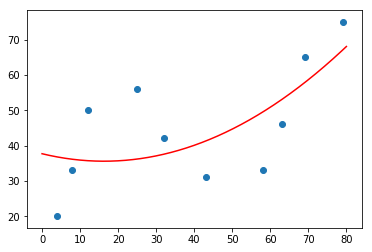

In [34]:
"""绘制拟合图像
"""
x_temp = np.array(x_temp).reshape(len(x_temp),1)
poly_x_temp = poly_features.fit_transform(x_temp)

plt.plot(x_temp, model.predict(poly_x_temp), 'r')
plt.scatter(x, y)

你会发现，上图似曾相识。它和公式（3）下方的图其实是一致的。

## 多项式回归预测